In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Read CSV File

In [31]:
df = pd.read_csv('data.csv')
df.sample(5)

,B0,B1,B2,B3,B4,B5,B6,B7,B8,B9,...,B13,B14,B15,B16,B17,B18,B19,J1,J2,J3
76110,-1.402470,-0.770423,0.705920,1.387900,-1.901700,0.930586,1.026790,-0.910974,-1.818100,-1.686080,...,-1.612970,-0.375129,-0.170306,0.901321,-0.405785,-1.903610,-1.112120,-127.289,148.448,21.159
3609,0.938061,-0.266606,0.631769,1.372710,0.628450,-1.051460,0.892687,0.494704,-0.731054,-0.421076,...,-1.798640,-1.644340,-1.565990,-1.567000,1.705280,0.434769,1.860330,-132.314,151.402,19.088
62740,0.198768,-0.279970,1.347460,-0.799712,-0.127871,-0.325621,1.177690,-1.038760,-0.998621,-1.976890,...,-0.209947,-1.562790,-1.576540,-0.603800,0.959980,0.842516,-1.876320,-135.183,154.509,19.326
85582,1.706560,-1.114960,-1.053700,0.252421,-0.322466,0.944315,0.836718,-0.799748,-1.103390,-1.578680,...,-0.542550,-1.933760,1.980960,-1.424460,1.446340,0.062732,-1.180390,-136.674,156.732,20.058
93952,0.487112,-0.491865,0.902413,-1.268660,1.829070,1.355820,-1.904800,-0.894886,-1.912250,1.132480,...,0.759855,-1.638460,1.803970,-1.764010,-0.117410,0.028143,-0.902729,-127.921,149.220,21.299


# DataFrame to np.array

In [32]:
features = df.drop(['J1', 'J2', 'J3'], axis=1)
features = np.array(features)
target_value = df['J3']
target_value = np.array(target_value)
min_j3 = np.min(target_value)
max_j3 = np.max(target_value)
print(f'target_min : {min_j3} and target_max : {max_j3}')

target_min : 17.20599999999999 and target_max : 24.561000000000007


In [33]:
cut_of=22.5
df['J4'] = np.where(df['J3'] > cut_of, 1, 0)  # 1 means Positive and 0 means Negative
target = df['J4']
count_j4 = target.value_counts()
print(f'Positive target count : {count_j4[1]} and Negative target count : {count_j4[0]}')

Positive target count : 2034 and Negative target count : 97966


# Train,Test,Split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Random Forest

In [35]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

#### Predictions

In [36]:
y_pred = rf_model.predict(x_test)
new_df = pd.DataFrame({'y_pred': y_pred, 'target': y_test})

## Confusion Matrix

In [37]:
conf_matrix = confusion_matrix(y_test, y_pred)
tp = conf_matrix[1, 1]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]
tn = conf_matrix[0, 0]
print(f'By SKLearn  : TN :{tn} , FP : {fp} , TP : {tp} , FN : {fn}')

TN = ((new_df['y_pred'] == 0) & (new_df['target'] == 0)).sum()
TP = ((new_df['y_pred'] == 1) & (new_df['target'] == 1)).sum()
FN = ((new_df['y_pred'] == 0) & (new_df['target'] == 1)).sum()
FP = ((new_df['y_pred'] == 1) & (new_df['target'] == 0)).sum()
print(f'By Function : TN :{TN} , FP : {FP} , TP : {TP} , FN : {FN}')

total = TN + TP + FN + FP
positives = TP + FN
negatives = TN + FP
sensitivity = TP / positives  # its recall
specificity = TN / negatives
precision = TP/(TP+FP)
# precision میگه از تعدادی که من مثبت تشخیص دادم ، چقدرشون واقعا مثبت بوده ، و recall میگه از تعدادی که واقعا مثبت هستند من چقدر رو تونستم به درستی تشخیص بدم .
print(f'Total : {total} , positives : {positives} , negatives : {negatives}')
print(f'Precision : {precision} , Recall or Sensitivity(TPR) : {sensitivity} , specificity : {specificity} , FPR : {FP / negatives}')

By SKLearn  : TN :19602 , FP : 0 , TP : 2 , FN : 396
By Function : TN :19602 , FP : 0 , TP : 2 , FN : 396
Total : 20000 , positives : 398 , negatives : 19602
Precision : 1.0 , Recall or Sensitivity(TPR) : 0.005025125628140704 , specificity : 1.0 , FPR : 0.0


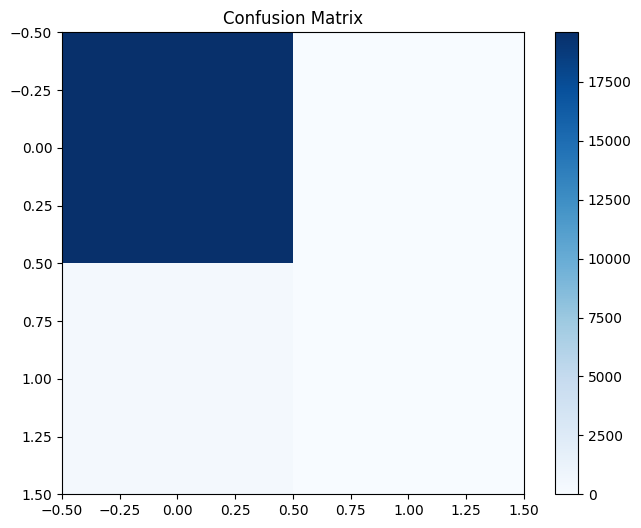

In [38]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

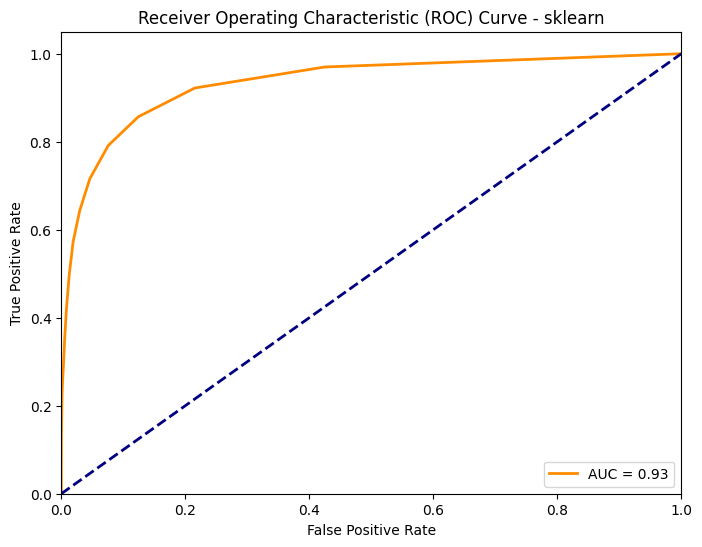

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - sklearn')
plt.legend(loc='lower right')
plt.show()


In [40]:
def roc_curve_scratch(y_labels, y_scores):
    thresholds = np.linspace(0, 1, 1001)
    fprs, tprs = [], []
    for thres in thresholds:
        tp, tn, fp, fn = confusion_matrix(y_labels, y_scores, thres)
        tprs.append(tpr(tp, tn, fp, fn))
        fprs.append(fpr(tp, tn, fp, fn))
        
    # force first and last fpr, tpr at 0 and 1 thresholds
    fprs[0] = 1
    fprs[-1] = 0
    tprs[0] = 1
    tprs[-1] = 0
    return fprs, tprs, thresholds
    
def confusion_matrix(y_labels, y_scores, thres):
    y_preds = (y_scores >= thres).astype(int)
    tp = (np.equal(y_labels, 1) & np.equal(y_preds, 1)).sum()
    tn = (np.equal(y_labels, 0) & np.equal(y_preds, 0)).sum()
    fp = (np.equal(y_labels, 0) & np.equal(y_preds, 1)).sum()
    fn = (np.equal(y_labels, 1) & np.equal(y_preds, 0)).sum()
    
    return tp, tn, fp, fn

def tpr(tp, tn, fp, fn):
    return tp/(tp+fn)

def fpr(tp, tn, fp, fn):
    return fp/(fp+tn)

def auc_scratch(fprs, tprs):
    """
    Cut in small rectangles and sum areas
    """
    total_auc = 0.
    for i in range(1000):  # divide curve in 1000 rectangles
        total_auc += (fprs[i] - fprs[i+1])*((tprs[i+1] + tprs[i])/2.)
    return total_auc


In [41]:
fprs, tprs, thresholds = roc_curve_scratch(y_test, rf_model.predict_proba(x_test)[:, 1])

In [42]:
auc_scratch(fprs, tprs)

0.9335328950640357

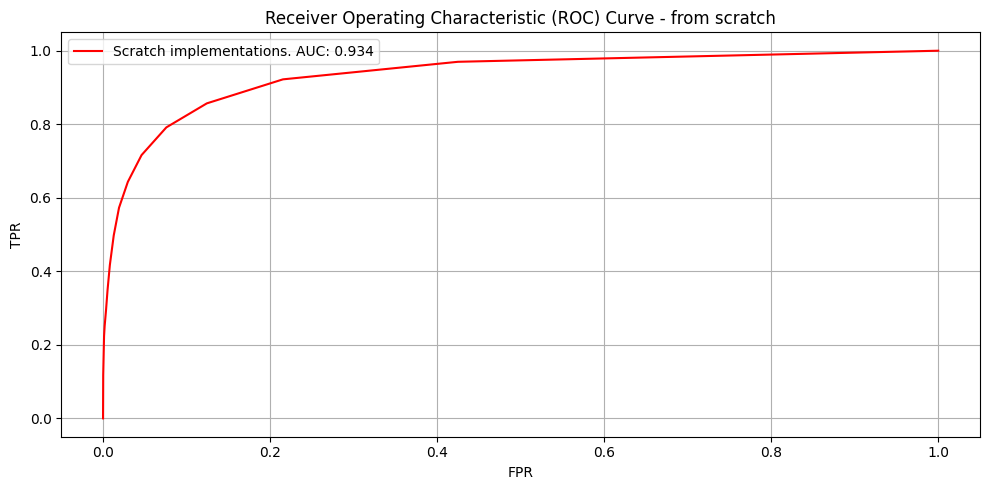

In [45]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(fprs, tprs, label= f'Scratch implementations. AUC: {auc_scratch(fprs, tprs):0.3f}', color='r')

ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.set_title('Receiver Operating Characteristic (ROC) Curve - from scratch')
ax.grid()
ax.legend()
fig.tight_layout()
